In [ ]:
## run this cell to install prosodic, then restart runtime as requested [you may need to install espeak as well

!pip install -U prosodic
!pip install lz4


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [1]:
##run this to import prosodic and avoid excessive logging
import pandas as pd
import prosodic
prosodic.logger.setLevel('ERROR')

## load metricalBERT model via pipeline

from transformers import pipeline
pipe = pipeline("text-classification", model = "katelyndekeer/metricalBERT_new")


Device set to use mps:0


The cells below give you three options for turning a line, set of lines, or .txt file of lines into prosodic.Text to then be parsed later. set the meter first. changing the meter will not automatically change parses unless you change the inputted text (this is a known bug)

In [2]:
# these are the meter parameters.
# if you want to play around with different rules and values, do that and make sure to change the inputs and rerun

constraints={
    'w_peak':3.0,
    'w_stress':1.0,
    's_unstress':1.0,
    'unres_across':2.0,
    'unres_within':2.0,

}
meter = prosodic.Meter(
    constraints=constraints,
    resolve_optionality=True,
    max_s=1,
    max_w=2,
    parse_unit='line'
)

meter.to_dict()

{'Meter': {'key': 'Meter(670644ba38b51383c4efb9b345d68d8b)',
  'constraints': {'w_peak': 3.0,
   'w_stress': 1.0,
   's_unstress': 1.0,
   'unres_across': 2.0,
   'unres_within': 2.0},
  'max_s': 1,
  'max_w': 2,
  'resolve_optionality': True,
  'exhaustive': False,
  'parse_unit': 'line'}}

In [3]:
pipe("eternal sunshine of the spotless mind")

[{'label': 'LABEL_0', 'score': 2.599604845046997}]

In [5]:
## parse by string. this cell turns one line into a prosodic Text object that can be parsed

def parse_line_and_compare(line):
    singleline = prosodic.Text(line)
    parses = singleline.parse(meter=meter)
    pscore = parses[0].best_parse.score

    result = pipe(line)[0]
    score = result['score']
    difference = abs(pscore - score)

    result = {
                "input_line": line.strip(),
                "pscore": pscore,
                "score": score,
                "difference": difference
            }

    print("Line: " + line)
    print("Prosodic score: " + str(pscore))
    print(f"MetricalBERT score: {score} )")
    print("Difference: " + str(difference))

    return result



In [7]:
parse_line_and_compare("eternal sunshine of the spotless mind")


[2.64s] Parsing lines [6x]:   0%|          | 0/1 [00:00<?, ?it/s]

Line: eternal sunshine of the spotless mind
Prosodic score: 2.0
MetricalBERT score: 2.599604845046997 )
Difference: 0.5996048450469971


{'input_line': 'eternal sunshine of the spotless mind',
 'pscore': 2.0,
 'score': 2.599604845046997,
 'difference': 0.5996048450469971}

In [37]:
# Assuming parse_line_and_compare returns three values: pscore, score, difference
def parse_file_and_compare(filepath):
    results = []  # List to store results
    with open(filepath, 'r') as f:
        for text_line in f:
            # Call parse_line_and_compare and unpack the returned values
            parse_line_and_compare(text_line.strip())
            result = parse_line_and_compare(text_line.strip())
            
            # Append the dictionary to the results list
            results.append(result)
    
    # Create a DataFrame from the results
    df = pd.DataFrame(results)
    return df

In [ ]:
parse_file_and_compare('/Users/bsg25/metricalgpt/metricalgpt/pl26.txt')



In [ ]:
df = parse_file_and_compare('/Users/bsg25/metricalgpt/metricalgpt/sundaymorning.txt')


In [57]:
mean_diff = df['difference'].mean()
std_diff = df['difference'].std()
print("Mean of difference:", mean_diff)
print("Standard deviation of difference:", std_diff)

Mean of difference: 0.9027770479520162
Standard deviation of difference: 0.72683243930927


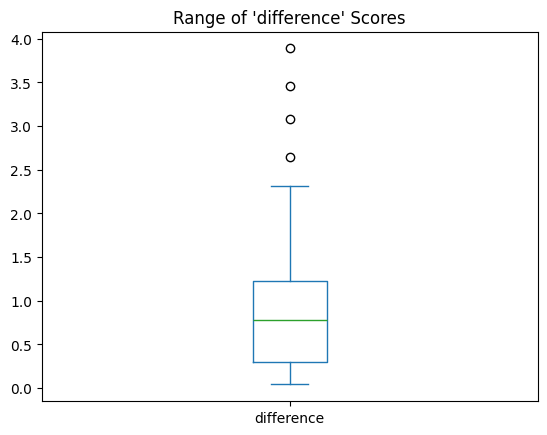

In [56]:
df['difference'].plot(kind='box')
plt.title("Range of 'difference' Scores")
plt.show()

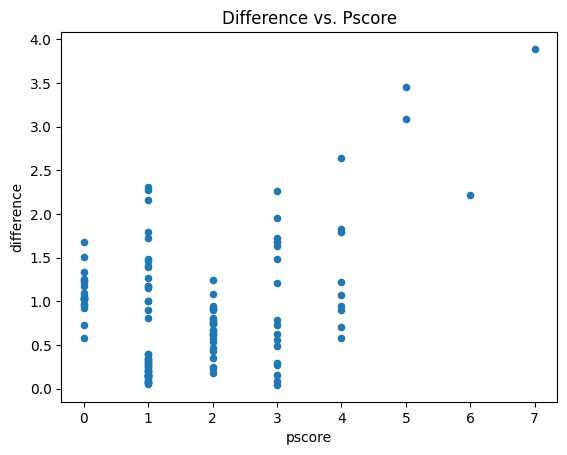

In [53]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame that contains 'pscore' and 'difference' columns
df.plot(x='pscore', y='difference', kind='scatter')
plt.title('Difference vs. Pscore')
plt.show()

In [55]:
model.fit(x, y)
coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(x, y)

print("Coefficient:", coef)
print("Intercept:", intercept)
print("R^2:", r2)

Coefficient: 0.20406134506512363
Intercept: 0.552471738923554
R^2: 0.14861555243483526


could calculate distance between parse scores line by line, check the average, maybe logarythmically / with softmax-like function so that higher scores don't warp things too much. or just 0 / not zero